# 3. Additional Plot Types

Gambaran umum jenis plot yang lebih kompleks termasuk dalam Seaborn.

## Categorical Plot Types

### stripplot() and swarmplot()

Banyak dataset memiliki data kategorikal dan Seaborn mendukung beberapa tipe plot yang berguna untuk data ini. Dalam contoh ini, kami akan terus melihat data Peningkatan Sekolah 2010 dan mengelompokkan data berdasarkan jenis model peningkatan sekolah yang digunakan.

Sebagai pengingat!, berikut adalah distribusi Jumlah Penghargaan dari KDE:

![](https://assets.datacamp.com/production/repositories/2210/datasets/2d65e2dd7875735d1db7f6ff0faa1d4577db50d3/tuition_kde_plot.png)

Meskipun plot ini bermanfaat, ada banyak lagi yang dapat kita pelajari dengan melihat masing-masing `Award_Amounts` dan bagaimana mereka didistribusikan di antara 4 kategori.

In [10]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assign file url
grant_file = 'datasets/schoolimprovement2010grants.csv'

# Read in the DataFrame
df = pd.read_csv(grant_file)
# Print data
df.head()

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West
3,3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,Transformation,641184,West
4,4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,399686,West


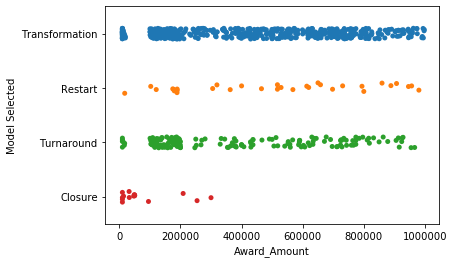

In [2]:
# Create the stripplot
sns.stripplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         jitter=True)

plt.show()

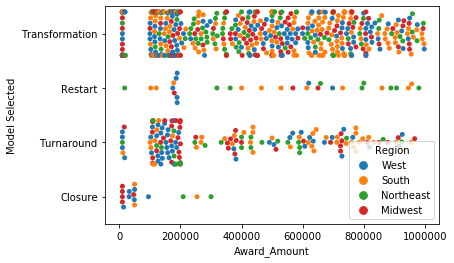

In [3]:
# Create and display a swarmplot with hue set to the Region
sns.swarmplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         hue='Region')

plt.show()

**Note** : Plot kategorikal yang menunjukkan setiap pengamatan bisa menjadi alat yang sangat bagus untuk mendapatkan wawasan tentang data Anda.

### boxplots, violinplots and lvplots

Plot kategoris Seaborn juga mendukung beberapa representasi data yang abstrak. API untuk masing-masing adalah sama sehingga sangat nyaman untuk mencoba setiap plot dan melihat apakah data cocok satu sama lain.

Dalam latihan ini, kita akan menggunakan opsi palet warna yang disajikan dalam Bab 2 untuk menunjukkan bagaimana warna dapat dengan mudah dimasukkan dalam plot.

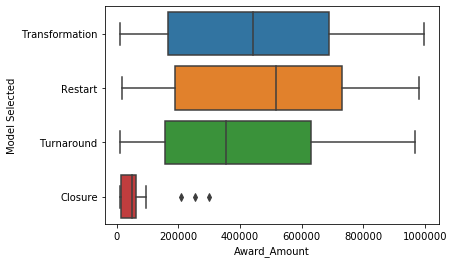

<Figure size 432x288 with 0 Axes>

In [4]:
# Create a boxplot
sns.boxplot(data=df,
         x='Award_Amount',
         y='Model Selected')

plt.show()
plt.clf()

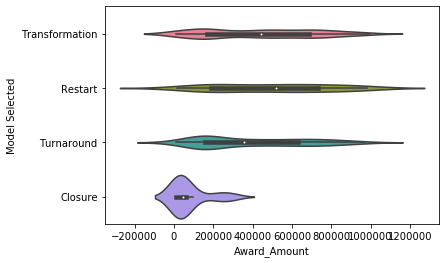

<Figure size 432x288 with 0 Axes>

In [9]:
# Create a violinplot with the husl palette
sns.violinplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         palette='husl')

plt.show()
plt.clf()

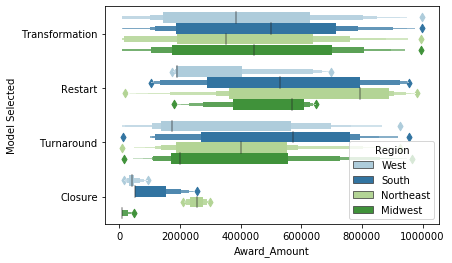

<Figure size 432x288 with 0 Axes>

In [17]:
# Block error message
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Create a lvplot with the Paired palette and the Region column as the hue
sns.lvplot(data=df, x='Award_Amount', y='Model Selected', palette='Paired', hue='Region')

plt.show()
plt.clf()

**Note** : API Seaborn membuatnya sangat mudah untuk membuat beberapa representasi abstrak dari data kategorikal.

### barplots, pointplots and countplots

Kelompok terakhir plot kategorikal adalah `barplot`, `pointplot`, dan `countplot` yang membuat ringkasan statistik data. Plot mengikuti API yang sama dengan plot lainnya dan memungkinkan penyesuaian lebih lanjut untuk masalah spesifik yang dihadapi.

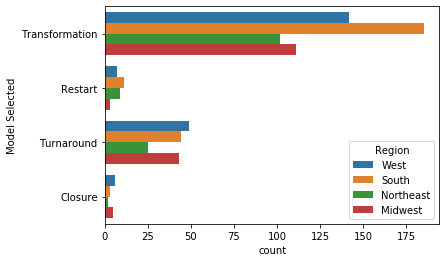

<Figure size 432x288 with 0 Axes>

In [18]:
# Show a countplot with the number of models used with each region a different color
sns.countplot(data=df, y="Model Selected", hue="Region")

plt.show()
plt.clf()

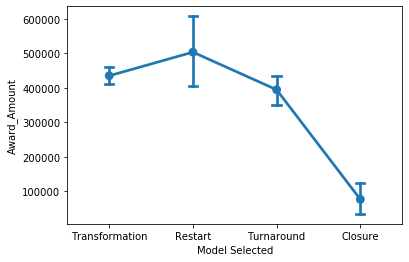

<Figure size 432x288 with 0 Axes>

In [19]:
# Create a pointplot and include the capsize in order to show bars on the confidence interval
sns.pointplot(data=df, y='Award_Amount', x='Model Selected', capsize=.1)

plt.show()
plt.clf()

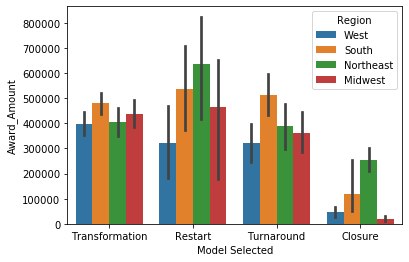

<Figure size 432x288 with 0 Axes>

In [20]:
# Create a barplot with each Region shown as a different color
sns.barplot(data=df, y='Award_Amount', x='Model Selected', hue='Region')

plt.show()
plt.clf()

**Note** : Pointplot dan barplot dapat menjadi visualisasi yang berguna untuk memahami variasi data kategorikal.

## Regression Plots

### Regression and residual plots

Regresi linier adalah alat yang berguna untuk memahami hubungan antara variabel numerik. Seaborn memiliki alat yang sederhana namun kuat untuk memeriksa hubungan ini.

Untuk latihan-latihan ini, kita akan melihat beberapa perincian dari Departemen Pendidikan AS tentang informasi biaya kuliah 4 tahun dan melihat apakah ada wawasan yang menarik tentang variabel mana yang dapat membantu memprediksi biaya kuliah.

In [21]:
# Load data
df = pd.read_csv("datasets/college_datav3.csv")

# Print data
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


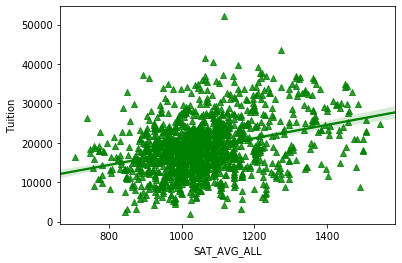

<Figure size 432x288 with 0 Axes>

In [22]:
# Display a regression plot for Tuition
sns.regplot(data=df, y='Tuition', x="SAT_AVG_ALL", marker='^', color='g')

plt.show()
plt.clf()

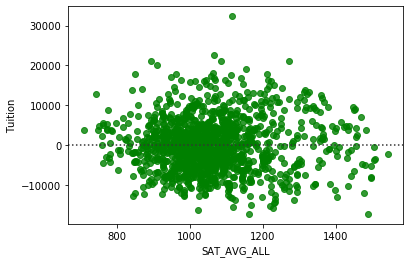

<Figure size 432x288 with 0 Axes>

In [24]:
# Display the residual plot
sns.residplot(data=df, y='Tuition', x="SAT_AVG_ALL", color='g')

plt.show()
plt.clf()

**Note** : Tampaknya ada hubungan linier antara uang sekolah dan nilai SAT.

### Regression plot parameters

Plot regresi Seaborn mendukung beberapa parameter yang dapat digunakan untuk mengonfigurasi plot dan mendorong lebih banyak wawasan ke dalam data.

Untuk latihan selanjutnya, kita dapat melihat hubungan antara biaya kuliah dan persentase siswa yang menerima hibah Pell. Hibah Pell didasarkan pada kebutuhan keuangan siswa dan disubsidi oleh Pemerintah AS. Dalam kumpulan data ini, setiap Universitas memiliki beberapa persentase siswa yang menerima hibah ini. Karena data ini kontinu, menggunakan `x_bins` dapat berguna untuk membagi persentase ke dalam kategori untuk meringkas dan memahami data.

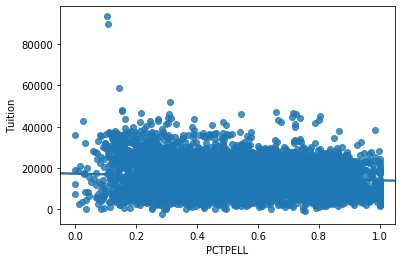

<Figure size 432x288 with 0 Axes>

In [28]:
# Plot a regression plot of Tuition and the Percentage of Pell Grants
sns.regplot(data=df, y='Tuition', x="PCTPELL")

plt.show()
plt.clf()

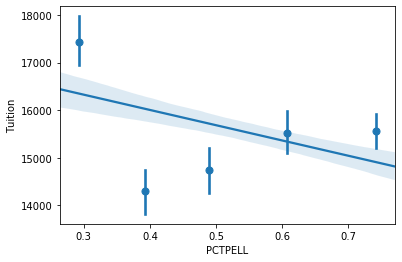

<Figure size 432x288 with 0 Axes>

In [29]:
# Create another plot that estimates the tuition by PCTPELL
sns.regplot(data=df, y='Tuition', x="PCTPELL", x_bins=5)

plt.show()
plt.clf()

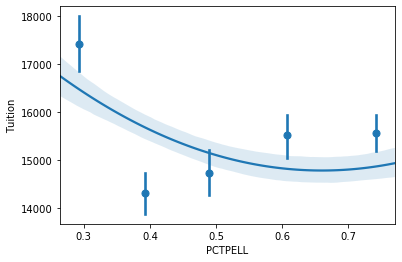

<Figure size 432x288 with 0 Axes>

In [31]:
# The final plot should include a line using a 2nd order polynomial
sns.regplot(data=df, y='Tuition', x="PCTPELL", x_bins=5, order=2)

plt.show()
plt.clf()

**Note** : Fungsi `regplot` adalah alat yang sangat kuat untuk menganalisis data dengan cepat. Pastikan untuk berhati-hati untuk tidak menyesuaikan data!

### Binning data

Ketika data pada sumbu x adalah nilai kontinu, dapat bermanfaat untuk memecahnya menjadi bins yang berbeda untuk mendapatkan visualisasi yang lebih baik dari perubahan dalam data.

Untuk latihan ini, kita akan melihat hubungan antara biaya kuliah dan populasi Sarjana disingkat `UG` dalam data ini. Kami akan mulai dengan melihat sebidang scatter data dan memeriksa dampak dari berbagai ukuran bin pada visualisasi.

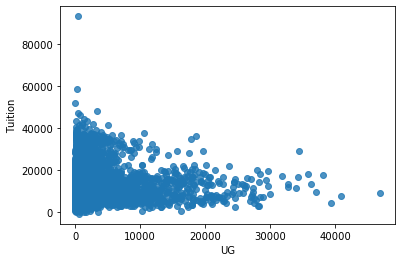

<Figure size 432x288 with 0 Axes>

In [32]:
# Create a scatter plot by disabling the regression line
sns.regplot(data=df, y='Tuition', x="UG", fit_reg=False)

plt.show()
plt.clf()

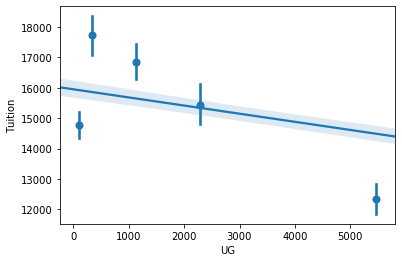

<Figure size 432x288 with 0 Axes>

In [33]:
# Create a scatter plot and bin the data into 5 bins
sns.regplot(data=df, y='Tuition', x="UG", x_bins=5)

plt.show()
plt.clf()

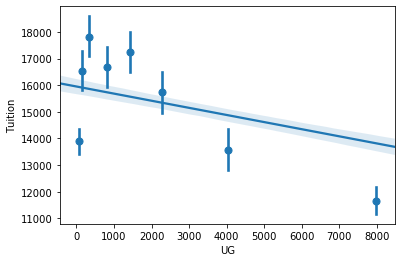

<Figure size 432x288 with 0 Axes>

In [34]:
# Create a regplot and bin the data into 8 bins
sns.regplot(data=df, y='Tuition', x="UG", x_bins=8)

plt.show()
plt.clf()

**Note** : Anda telah belajar cara menggunakan fungsi `regplot` untuk menganalisis data!

## Matrix plots

### Creating heatmaps

Heatmap adalah plot matriks umum yang dapat digunakan untuk meringkas hubungan antara dua variabel secara grafis. Untuk latihan ini, kita akan mulai dengan melihat data tamu Daily Show dari tahun 1999 - 2015 dan melihat bagaimana pekerjaan para tamu telah berubah dari waktu ke waktu.

Data termasuk tanggal setiap penampilan tamu serta pekerjaan mereka. Untuk latihan pertama, kita perlu memasukkan data ke format yang tepat agar fungsi heatmap Seaborn untuk memplot data dapat berfungsi dengan benar.

In [35]:
# Load data
df = pd.read_csv("datasets/daily_show_guests_cleaned.csv")

# Print data
df.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


YEAR            1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Group                                                                        
Academic           0     0     2     0     4     1    12     9    13     5   
Acting           108   100    92    84    74    51    44    44    25    26   
Advocacy           0     1     0     1     0     4     0     0     2     3   
Athletics          0     3     1     2     0     2     2     5     4     1   
Business           0     1     0     0     0     2     1     1     2     1   
Clergy             0     0     0     1     1     1     0     0     1     0   
Comedy            25    12    11     5    12     7     5     8     9     7   
Consultant         0     0     0     0     1     4     1     4     2     3   
Government         0     0     2     1     2     3     1     3     1     0   
Media             11    21    31    42    41    45    54    47    47    77   
Military           0     0     0     0     0     0     1     1  

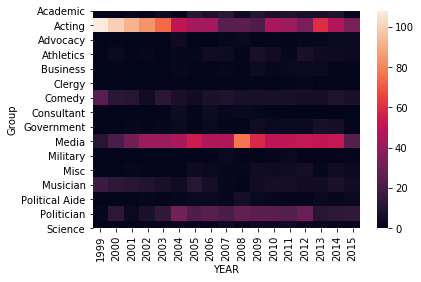

In [38]:
# Create a crosstab table of the data
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])
print(pd_crosstab)

# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

### Customizing heatmaps

Seaborn mendukung beberapa jenis penyesuaian tambahan untuk meningkatkan output dari heatmap. 

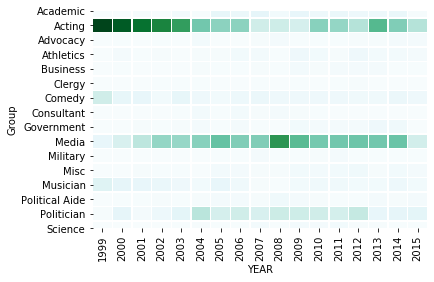

<Figure size 432x288 with 0 Axes>

In [39]:
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#Show the plot
plt.show()
plt.clf()